In [9]:
import numpy as np
import pickle
import seaborn as sns

In [5]:
n_spins = 8
num_circuits = 147  ## number of pickle files

In [6]:
def new_proposal(counts: dict,twirl:int = 0,shots:int = 10**5):
    matrix_update = np.zeros((2**n_spins,2**n_spins))
    for state in counts:
        input,output = state.split(" ")
        matrix_update[int(input,2)^twirl,int(output,2)^twirl] = (counts[state]/shots) * 2**n_spins
    return matrix_update

def update_proposal(proposal_matrix, counts: dict,twirl:int = 0,shots:int = 10**5):
    new_matrix = new_proposal(counts,twirl,shots)
    return proposal_matrix + new_matrix

def normalize_proposal(proposal_matrix):
    col_sums = proposal_matrix.sum(axis=0)
    proposal_matrix_normed = proposal_matrix / col_sums[np.newaxis,:]
    return proposal_matrix_normed

In [7]:
from os import listdir
proposal_matrix = np.zeros((2**n_spins,2**n_spins))

for file in [path for path in listdir("DATA/raw-circuit-outputs/") if path.endswith('pickle') and path.startswith("sm1id") ]:
    with open("DATA/raw-circuit-outputs/"+file, "rb") as fp:
        out = pickle.load(fp).get_counts()
        proposal_matrix = update_proposal(proposal_matrix,out)
        


In [8]:
proposal_matrix = normalize_proposal(proposal_matrix)


In [13]:
sum(proposal_matrix[1])

2.6820553668402867

In [15]:
sum(proposal_matrix[1])

2.6820553668402867

In [ ]:
transition_dict = {}



<AxesSubplot: >

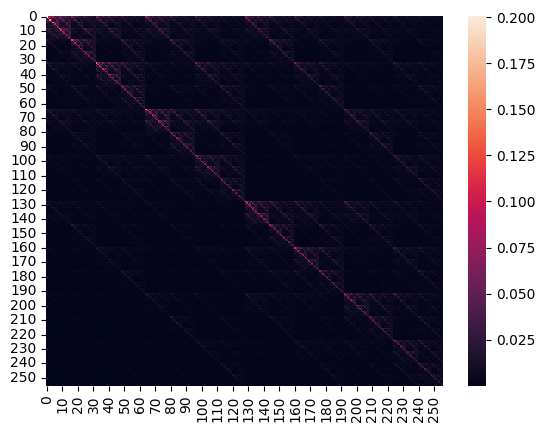

In [10]:
sns.heatmap(proposal_matrix)

In [14]:
propsal_matrix = proposal_matrix.transpose()

In [19]:
sum(proposal_matrix[0]),sum(proposal_matrix[1])

(5.007515519177682, 2.6820553668402867)

In [86]:
import time
np.save('DATA/proposal_matrix/'+'proposal_matrix'+ str(int(time.time())), proposal_matrix)